#Video Game Data Analysis

The data from the ESRB will be analyzed in this notebook. After analysis is completed, it will be clearer which games succeeded and which did not. Also, it will help with advertising for the sales of video games next year.

In [561]:
import pandas as pd
import streamlit as st
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [562]:
df_games = pd.read_csv('moved_games.csv')
display(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [563]:
display(df_games.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [564]:
display(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [565]:
df_games = df_games.rename(
    columns={'Name':'name',
             'Platform':'platform',
             'Year_of_Release':'year_of_release',
             'Genre':'genre',
             'NA_sales':'na_sales',
             "EU_sales":'eu_sales',
             'JP_sales':'jp_sales',
             'Other_sales':'other_sales',
             'Critic_Score':'critic_score',
             'User_Score':'user_score',
             'Rating':'rating'})
display(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [566]:
display(df_games['user_score'].unique())
display(df_games['critic_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

This cell will first fill empty cells with appropriate default values. Then, the year_of_release column will be changed to integers since years are not used with decimals. The user_score column should be floats, and scores with 'tbd' should be marked with the median score. This ensures the remaining data will not appear skewed and confuse others when analyzing the data later. The critic_score will be changed to integers because all scores given by critics always end in .0 meaning no decimals were used originally.

In [567]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['year_of_release'].median())
df_games['rating'] = df_games['rating'].fillna('Unknown')
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())
df_games['genre'] = df_games['genre'].fillna('Unknown')

In [568]:
df_games['user_score'] = df_games['user_score'].replace(to_replace='tbd',value=None)
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())
df_games['user_score'] = df_games['user_score'].astype('float64')

In [569]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')
df_games['critic_score'] = df_games['critic_score'].astype('int64')
df_games['user_score'] = df_games['user_score'].astype('float64')

In [570]:
display(df_games['user_score'].sort_values().unique())
display(df_games['critic_score'].sort_values().unique())
display(df_games['year_of_release'].sort_values().unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7])

array([13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
      dtype=int64)

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

In [571]:
display(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


None

In [572]:
display(df_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,7.5,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,7.5,Unknown


Now that the empty cells have been filled, it is time to search for duplicate games. I will search for obvious duplicates first, and then implicit duplicates after. The duplicates will all be from the name of the games being played on the same console.

In [573]:
display(df_games[(df_games.duplicated())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No obvious duplicates. Now, it's time to search for implicit duplicates by printing duplicate names and seeing if they come from the same console.

In [574]:
df_duplicate_games = df_games[df_games['name'].duplicated()]
df_duplicate_games = df_duplicate_games.groupby(['name','platform']).count().sort_values(by='genre',ascending=False)
display(df_duplicate_games.head(10))

year_of_release  genre  na_sales  \
name                        platform                                     
Need for Speed: Most Wanted PC                      2      2         2   
                            X360                    2      2         2   
Madden NFL 13               PS3                     2      2         2   
Sonic the Hedgehog          PS3                     2      2         2   
Rhythm Heaven               Wii                     1      1         1   
Ride 2                      PC                      1      1         1   
Ride                        XOne                    1      1         1   
                            X360                    1      1         1   
                            PS3                     1      1         1   
                            PC                      1      1         1   

                                      eu_sales  jp_sales  other_sales  \
name                        platform                                    
Need for Speed: Most Wanted PC               2         2            2   
                            X360             2         2            2   
Madden NFL 13               PS3              2         2            2   
Sonic the Hedgehog          PS3              2         2            2   
Rhythm Heaven               Wii              1         1            1   
Ride 2                      PC               1         1            1   
Ride                        XOne             1         1            1   
                            X360             1         1            1   
                            PS3              1         1            1   
                            PC               1         1            1   

                                      critic_score  user_score  rating  
name                        platform                                    
Need for Speed: Most Wanted PC                   2           2       2  
                            X360                 2           2       2  
Madden NFL 13               PS3                  2           2       2  
Sonic the Hedgehog          PS3                  2           2       2  
Rhythm Heaven               Wii                  1           1       1  
Ride 2                      PC                   1           1       1  
Ride                        XOne                 1           1       1  
                            X360                 1           1       1  
                            PS3                  1           1       1  
                            PC                   1           1       1

Three games have possible implicit duplicates: Need for Speed: Most Wanted, Madden NFL 13, and Sonic the Hedgehog. These implicit duplicates need to be removed. All sales from the duplicate value will be added to the original to ensure no lost sales counts in the data.

In [575]:
display(df_games[df_games['name']=='Need for Speed: Most Wanted'])
display(df_games[df_games['name']=='Madden NFL 13'])
display(df_games[df_games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,71,7.5,Unknown
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,71,7.5,Unknown
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,71,7.5,Unknown
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,71,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,71,7.5,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+
4127,Sonic the Hedgehog,PS3,2007,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+


Need for Speed actually does not have any duplicates to be removed. The game was released in 2005 and 2012 on several different consoles. Madden and Sonic both have duplicate postings on the PS3. The dupicates will now be removed and the sales from the duplicate post will be added to the original.

In [576]:
df_games.loc[(df_games['name'] == 'Madden NFL 13') & (df_games['eu_sales'] == 0.22),'eu_sales'] = 0.23
df_games.loc[(df_games['name'] == 'Sonic the Hedgehog') & (df_games['eu_sales'] == 0.06),'eu_sales'] = 0.54
df_games.drop(4127,inplace=True)
df_games.drop(16230,inplace=True)


In [577]:
display(df_games[df_games['name']=='Madden NFL 13'])
display(df_games[df_games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,71,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,71,7.5,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.54,0.04,0.66,43,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+


Now that all duplicates have been removed from the DataFrame, it is time to start enriching the data. Start with finding the total sales of each game and creating a new column in the DataFrame for it.

In [578]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
display(df_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,7.5,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,7.5,Unknown,28.31


In [579]:
platform_sales = []
platform_choice = df_games['platform'].unique()
for platform in platform_choice:
    platform_sales.append([platform,round(df_games[(df_games['platform']==platform)]['total_sales'].sum(),2)])
display(platform_sales)

[['Wii', 907.51],
 ['NES', 251.05],
 ['GB', 255.46],
 ['DS', 806.12],
 ['X360', 971.42],
 ['PS3', 939.65],
 ['PS2', 1255.77],
 ['SNES', 200.04],
 ['GBA', 317.85],
 ['PS4', 314.14],
 ['3DS', 259.0],
 ['N64', 218.68],
 ['PS', 730.86],
 ['XB', 257.74],
 ['PC', 259.52],
 ['2600', 96.98],
 ['PSP', 294.05],
 ['XOne', 159.32],
 ['WiiU', 82.19],
 ['GC', 198.93],
 ['GEN', 30.77],
 ['DC', 15.95],
 ['PSV', 54.07],
 ['SAT', 33.59],
 ['SCD', 1.86],
 ['WS', 1.42],
 ['NG', 1.44],
 ['TG16', 0.16],
 ['3DO', 0.1],
 ['GG', 0.04],
 ['PCFX', 0.03]]

The PS2 had the most total sales next to every other platform in this dataset. Now it is time to build distributions on the PS2 data to see when they were popular, and use their primetime years to evaluate how and why they were so successful.

In [580]:
ps2_games = df_games[(df_games['platform']=='PS2')]
display(ps2_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


In [581]:
display(ps2_games.groupby('year_of_release')['name'].count())

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    248
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64

Based on the ps2 data by year, the platform was creating games from 2000-2011. This is the time period I will be focusing on to further analyze the data.

In [582]:
relevant_games = df_games[(df_games['year_of_release'] >= 2000) & (df_games['year_of_release'] <= 2011)]

In [583]:
display(relevant_games.groupby('platform')['total_sales'].sum())

platform
2600      10.50
3DS       64.39
DC         7.41
DS       793.55
GB        30.03
GBA      317.85
GC       198.93
N64       37.97
PC       146.83
PS       143.98
PS2     1255.77
PS3      650.86
PSP      282.86
PSV        4.89
WS         0.96
Wii      872.14
X360     734.88
XB       257.74
Name: total_sales, dtype: float64

In this timeframe, besides the PS2, the DS, Wii, and XBOX 360 are leading in sales. The PS3 is not too far behind. Let's see which of these are growing, and which are shrinking.

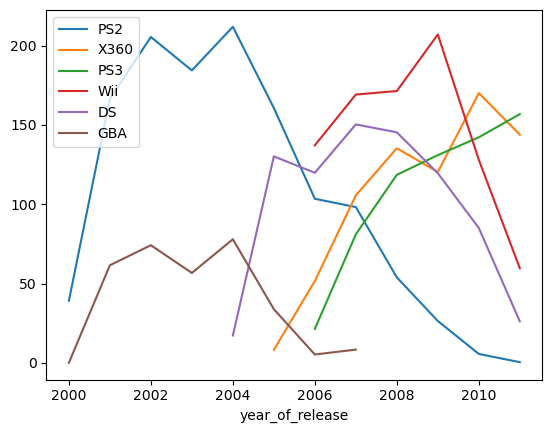

In [584]:
for popular_platform in ['PS2','X360','PS3','Wii','DS','GBA']:
    relevant_games[relevant_games['platform']==popular_platform].groupby('year_of_release')['total_sales'].sum().plot()
plt.legend(['PS2','X360','PS3','Wii','DS','GBA'])
plt.show()

In this timeframe, we saw the ps2 rise and fall, along with the DS, and even the Wii. The XBOX 360 was still high and it is inconclusive if it was falling, or if it just had a slow year. With the fall of the PS2, it was clear that the rise of the PS3 was underway. A very successful platform maybe has a lifespan of popularity of about 10 years. An average platform seems to rise and fall in about 6-7 years.

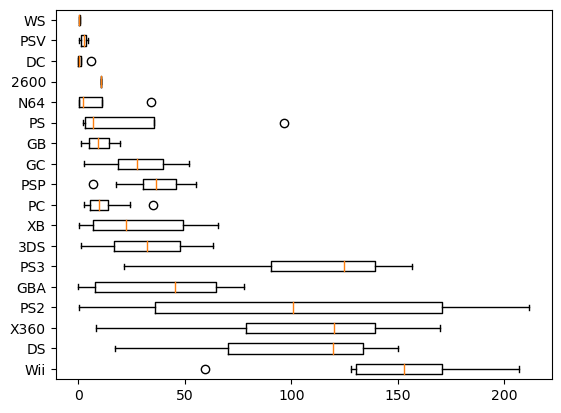

In [585]:
data = []
for platform in relevant_games['platform'].unique():
    data.append(relevant_games[relevant_games['platform']==platform].groupby('year_of_release')['total_sales'].sum())
plt.boxplot(data,vert=False,showfliers=True,labels=relevant_games['platform'].unique())
plt.show()

The difference in sales is very significant between platforms. The most popular platforms have median yearly total sales over triple the less popular platforms. For the largest platforms, their yearly sales were around 120, and the other platforms had yearly sales around 40 or less. Given the timeframe covers the entire existence of the ps2, it has the widest range of yearly sales. On the opposite side, a platform like the 2600 only has data from one year, 2007, in this entire timeframe. Therefore, its range is just one value. The most competitive platforms in this timeframe to the PS2, besides the PS3 since they are the same company, was the XBOX 360, DS, and Wii. 

I will now take a closer look at the XBOX 360, my personal favorite console, and see how its sales were affected by users, and professional critics. 

In [586]:
xbox_games = relevant_games[relevant_games['platform']=='X360']

<AxesSubplot:title={'center':'Sales vs Critics'}, xlabel='Critic Score', ylabel='Total Sales (USD)'>

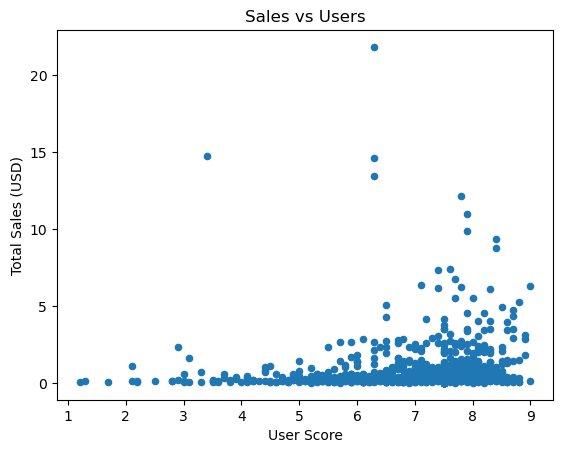

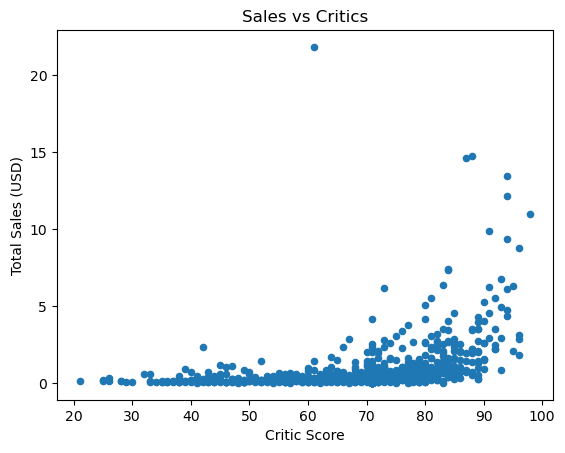

In [587]:
xbox_games.plot(
                kind='scatter',
                title='Sales vs Users',
                x='user_score',
                y='total_sales',
                xlabel='User Score',
                ylabel='Total Sales (USD)'
)
xbox_games.plot(
                kind='scatter',
                title='Sales vs Critics',
                x='critic_score',
                y='total_sales',
                xlabel='Critic Score',
                ylabel='Total Sales (USD)'
)

Based on the scatterplots, there seems to be a little correlation between sales and scores of both critics and users. The effect is not noticed until the user and critic scores are in the top about 20% of scores. The exception to this general rule is the game that Nintendo geniusely included, Wii Sports. This strategy provided all new players with an immediate game and a quick boost. Time to run a quick formality of testing hypotheses on sales versus critics and users.

Null Hypothesis: Total Sales are affected by the scores of critics, and users.

Alternate Hypothesis: Total Sales are not affected by the scores of critics, and users.

In [588]:
alpha = 0.05
results = stats.ttest_ind(xbox_games.groupby('year_of_release')['total_sales'].mean() , xbox_games.groupby('year_of_release')['user_score'].mean() , equal_var=True)

display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display("We reject the null hypothesis: sales were not significantly affected by user scores.")
else:
    display("We can't reject the null hypothesis: sales were significantly affected by user scores.")

'p-value:'

4.473715052514425e-17

'We reject the null hypothesis: sales were not significantly affected by user scores.'

In [589]:
results = stats.ttest_ind(xbox_games.groupby('year_of_release')['total_sales'].mean() , xbox_games.groupby('year_of_release')['critic_score'].mean() , equal_var=True)

display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display("We reject the null hypothesis: sales were not significantly affected by critic scores.")
else:
    display("We can't reject the null hypothesis: sales were significantly affected by critic scores.")

'p-value:'

1.8758878570575626e-16

'We reject the null hypothesis: sales were not significantly affected by critic scores.'

In [590]:
display(relevant_games.count())

name               11852
platform           11852
year_of_release    11852
genre              11852
na_sales           11852
eu_sales           11852
jp_sales           11852
other_sales        11852
critic_score       11852
user_score         11852
rating             11852
total_sales        11852
dtype: int64

In [591]:
multiple_platforms = relevant_games.groupby('name').count()
multiple_platforms = multiple_platforms[multiple_platforms['platform']>1]
display(multiple_platforms.sample(5))

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
name,,,,,,,,,,,
Star Trek: Conquest,2,2,2,2,2,2,2,2,2,2,2
Man vs. Wild,3,3,3,3,3,3,3,3,3,3,3
The Sims 2: Pets,6,6,6,6,6,6,6,6,6,6,6
Paws & Claws: Pet Vet,2,2,2,2,2,2,2,2,2,2,2
Chaotic: Shadow Warriors,4,4,4,4,4,4,4,4,4,4,4


it's time to start building the streamlit app. I will give the app a table sorted by console since companies and players compare their games by the consoles played on. Then, I will also build scatterplots that will help show correlation between scores by critics or users, and resulting sales. If there is a correlation anywhere, this will help the companies determine who should be impressed, and how to better advertise their upcoming games.

In [592]:
st.header('Video Game Sales')
st.write('''
         Filter the data by platform to see the data of many video games and their popularity and sales.
         ''')

In [593]:
make_choice_platform = st.selectbox('Select Platform:',platform_choice)

In [594]:
min_year,max_year = (df_games['year_of_release'].min() , df_games['year_of_release'].max())
year_range = st.slider(label='Choose year',step=int(1),min_value=int(min_year),max_value=int(max_year),value=(int(min_year),int(max_year)))

In [595]:
actual_range = list(range(year_range[0],year_range[1]+1))

In [596]:
filtered_type = df_games[(df_games['platform']==make_choice_platform) & (df_games['year_of_release'].isin(list(actual_range)))]
st.table(filtered_type.head(10))

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [597]:
st.header('Game Success Analysis')
st.write("""
Let's see what influences the success of a game the most. We will compare total sales to user_score, critic_score, genre and rating.""")

In [598]:
import plotly.express as px

list_for_scatter = ['genre','critic_score','user_score','rating']
choice_for_scatter = st.selectbox('Game sales dependency on ',list_for_scatter)
scatter = px.scatter(df_games , x='total_sales' , y=choice_for_scatter , hover_data=['year_of_release'])
scatter.update_layout(title="<b> Price vs {}<b>".format(choice_for_scatter))
st.plotly_chart(scatter)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [599]:
list_for_scatter_2 = ['genre','critic_score','total_sales','rating']
choice_for_scatter_2 = st.selectbox('Game user popularity dependency on ',list_for_scatter_2)
scatter_2 = px.scatter(df_games , x='user_score' , y=choice_for_scatter_2 , hover_data=['year_of_release'])
scatter_2.update_layout(title="<b> Price vs {}<b>".format(choice_for_scatter_2))
st.plotly_chart(scatter_2)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [600]:
list_for_scatter_3 = ['genre','user_score','total_sales','rating']
choice_for_scatter_3 = st.selectbox('Game critic popularity dependency on ',list_for_scatter_3)
scatter_3 = px.scatter(df_games , x='critic_score' , y=choice_for_scatter_3 , hover_data=['year_of_release'])
scatter_3.update_layout(title="<b> Price vs {}<b>".format(choice_for_scatter_3))
st.plotly_chart(scatter_3)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)